# Q1

In [ ]:
pip install -q -U keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D


In [ ]:
df = tf.keras.datasets.fashion_mnist
(train_df, train_label), (test_df, test_label) = df.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_df = train_df / 255.0
test_df = test_df / 255.0


In [ ]:
train_df = train_df.reshape(len(train_df), 28, 28, 1)
test_df = test_df.reshape(len(test_df), 28, 28, 1)


In [ ]:
!rm -r /content/untitled_project

In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers

def model_builder(hp):
    model = tf.keras.Sequential()
    # Tune the number of conv layers
    for i in range(hp.Int('conv_layers', 1, 5)):
        filter_size = hp.Choice('kernel_size', values=[3, 5, 8])
        model.add(layers.Conv2D(filters=hp.Int('filters_' + str(i), 32, 256, step=32),
                                kernel_size = (filter_size, filter_size), activation='relu'))
    model.add(layers.Flatten())
    # Tune the number of dense layers
    for i in range(hp.Int('dense_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 256, step=32), activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer
    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(model_builder,
                        objective='val_accuracy',
                        max_trials=10,  # specify the number of trials
                        seed=42)  # for reproducibility

tuner.search(train_df, train_label, epochs=5, validation_split=0.2)


Trial 10 Complete [00h 01m 37s]
val_accuracy: 0.8944166898727417

Best val_accuracy So Far: 0.9135000109672546
Total elapsed time: 00h 13m 25s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_df, train_label, epochs=6, validation_split=0.2)


Epoch 1/6
1500/1500 [==============================] - 20s 12ms/step - loss: 0.6254 - accuracy: 0.7804 - val_loss: 0.3571 - val_accuracy: 0.8703
Epoch 2/6
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3629 - accuracy: 0.8764 - val_loss: 0.2820 - val_accuracy: 0.9013
Epoch 3/6
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2817 - accuracy: 0.9035 - val_loss: 0.2575 - val_accuracy: 0.9032
Epoch 4/6
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2278 - accuracy: 0.9220 - val_loss: 0.2688 - val_accuracy: 0.9104
Epoch 5/6
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1837 - accuracy: 0.9371 - val_loss: 0.3066 - val_accuracy: 0.9088
Epoch 6/6
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1428 - accuracy: 0.9525 - val_loss: 0.3023 - val_accuracy: 0.9112


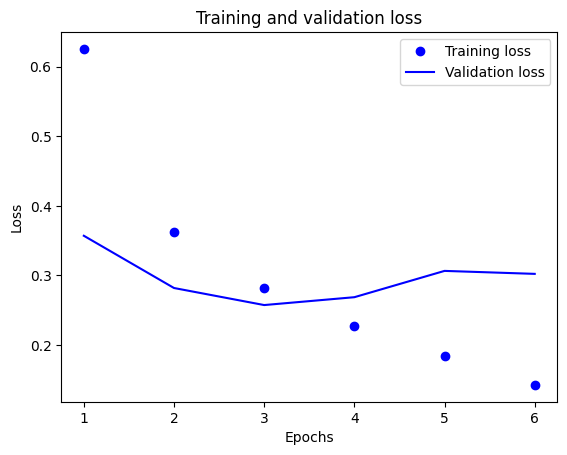

In [ ]:
import matplotlib.pyplot as plt

# Get the history data
history_dict = history.history

# Extract loss and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# "b" is for "solid blue line"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Q7

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [2]:
import numpy as np
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]
print(train_images.shape)


(60000, 28, 28)


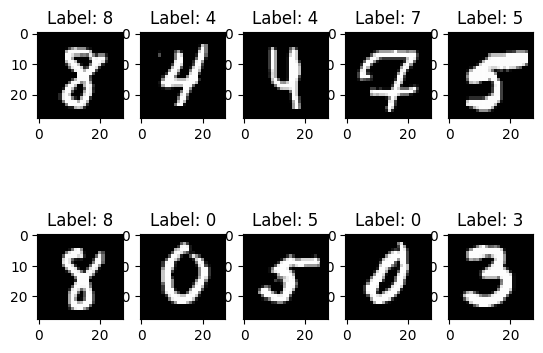

In [3]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
plt.show()


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [5]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', name = "last_conv_layer"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 last_conv_layer (Conv2D)    (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Split the training data into training and validation sets
val_images = train_images[:10000]
partial_train_images = train_images[10000:]

val_labels = train_labels[:10000]
partial_train_labels = train_labels[10000:]

# Train the model with validation data
history = model.fit(partial_train_images, partial_train_labels, epochs=15, batch_size=64, validation_data=(val_images, val_labels))


Epoch 1/15
782/782 [==============================] - 20s 13ms/step - loss: 0.1881 - accuracy: 0.9410 - val_loss: 0.0740 - val_accuracy: 0.9767
Epoch 2/15
782/782 [==============================] - 9s 12ms/step - loss: 0.0509 - accuracy: 0.9836 - val_loss: 0.0500 - val_accuracy: 0.9845
Epoch 3/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0506 - val_accuracy: 0.9846
Epoch 4/15
782/782 [==============================] - 5s 7ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 5/15
782/782 [==============================] - 4s 5ms/step - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.0470 - val_accuracy: 0.9870
Epoch 6/15
782/782 [==============================] - 4s 5ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0551 - val_accuracy: 0.9842
Epoch 7/15
782/782 [==============================] - 5s 6ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0373 - val_accuracy: 0.9892
Epo

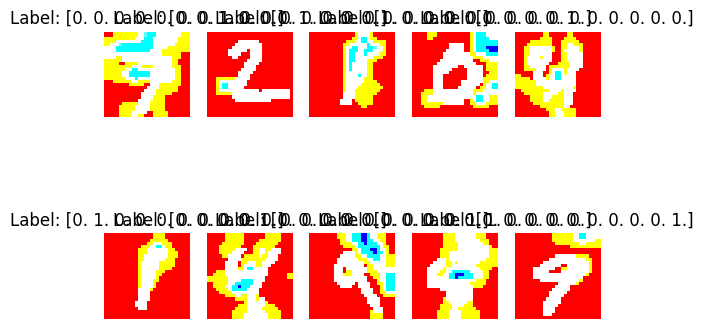

In [39]:
import cv2
import numpy as np
import tensorflow.keras.backend as K
import tensorflow as tf

# Define the Grad-CAM function
def grad_cam(model, img, layer_name):
    # Get the last convolutional layer
    last_conv_layer = model.get_layer(layer_name)

    # Create a new model that outputs the last convolutional layer and the model's output
    grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

    # Get the gradients of the predicted class with respect to the last convolutional layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)
        loss = predictions[:, np.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)

    # Compute the mean intensity of the gradients over each channel
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map by the corresponding gradient value
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Resize the heatmap to match the original image size
    heatmap = cv2.resize(heatmap[0], (img.shape[2], img.shape[1]))

    # Convert the heatmap to 8-bit image
    heatmap = np.uint8(255 * heatmap)

    # Apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Convert the original image to 8-bit
    img = np.array(img[0]*255, dtype = np.uint8)

    # If the original image is grayscale, convert it to color
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    superimposed_img = heatmap*0.4 + img * 0.6 + 0

    return superimposed_img

# Apply Grad-CAM on the last convolutional layer for the 10 image samples
for i in range(10):
    img = test_images[i].reshape((1, 28, 28, 1))
    superimposed_img = grad_cam(model, img, "last_conv_layer")

    plt.subplot(2, 5, i+1)
    plt.imshow(superimposed_img, cmap='gray')
    plt.title(f'Label: {test_labels[i]}')
    plt.axis('off')

plt.show()
